In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [54]:
df = pd.read_csv("C:/Users/Admin/Desktop/Amazon-Product-Recommender-System-master/Recommender System/reviewsWithHeader.csv")

In [55]:
print(df.columns)
print(df.shape)

Index(['asin', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'helpful', 'total'],
      dtype='object')
(278677, 10)


### Product based CF

In [56]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,asin,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_x,total_x,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,helpful_y,total_y
0,31887,5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,0,0,23,23,23,23,23,23,23,23,23
1,31887,5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,0,0,23,23,23,23,23,23,23,23,23
2,31887,5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,0,0,23,23,23,23,23,23,23,23,23
3,31887,5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,0,0,23,23,23,23,23,23,23,23,23
4,31887,5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,0,0,23,23,23,23,23,23,23,23,23
5,31887,4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000,0,0,23,23,23,23,23,23,23,23,23
6,31887,5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200,0,0,23,23,23,23,23,23,23,23,23
7,31887,5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800,0,0,23,23,23,23,23,23,23,23,23
8,31887,4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600,0,0,23,23,23,23,23,23,23,23,23
9,31887,5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000,7,8,23,23,23,23,23,23,23,23,23


In [57]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

Selecting products which have more than 50 reviews

In [58]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount

,asin,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_x,total_x,...,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,helpful_y,total_y,totalReviewers,overallScore,summaryReview
161700,B005LERHD8,4,I was expecting it to be more of a gold tint w...,"01 10, 2013",A205ZO9KZY2ZD2,Winnie,It's ok,1357776000,0,0,...,441,441,441,441,441,441,441,441,4,It's ok
161269,B005LERHD8,4,The owl necklace is really cute but made real ...,"07 23, 2012",A1HFSY6W8LJNJM,"Alicia7tommy ""Alicia Andrews""",Really Cute,1343001600,0,0,...,441,441,441,441,441,441,441,441,4,Really Cute
161280,B005LERHD8,4,Very pretty. A lot bigger than I expected. I...,"01 11, 2013",A23L30BKF59BO4,Amazon Customer,Very pretty,1357862400,0,0,...,441,441,441,441,441,441,441,441,4,Very pretty
161279,B005LERHD8,1,I order xmcheap jewelry on amazon all the tone...,"02 25, 2014",A1B1YH4TZ326SX,Amazon Customer,Not worth your money,1393286400,0,0,...,441,441,441,441,441,441,441,441,1,Not worth your money
161278,B005LERHD8,5,I am using it as an acessorie on my first day ...,"08 15, 2013",A2AEFSWJCJ8Q6P,Amazon Customer,Really pretty!,1376524800,0,0,...,441,441,441,441,441,441,441,441,5,Really pretty!
161277,B005LERHD8,4,Husband got this for me and it's really cute. ...,"05 9, 2014",A1WPO8LZHY3YN2,Amazon Customer,Cute,1399593600,0,0,...,441,441,441,441,441,441,441,441,4,Cute
161276,B005LERHD8,4,"i don't know why, it is prob the size, but i a...","05 21, 2013",A3F5FQ15IE0PDG,A.Mary,nice except the eyes are a little creepy,1369094400,0,0,...,441,441,441,441,441,441,441,441,4,nice except the eyes are a little creepy
161275,B005LERHD8,5,"Cute, nice quality. Nice length.","07 8, 2014",A3HICO8WGUNJGM,Amanda W.,nice quality. Nice length,1404777600,0,0,...,441,441,441,441,441,441,441,441,5,nice quality. Nice length
161274,B005LERHD8,4,This is a really cute piece of jewelery. The c...,"01 27, 2014",A11FNXJY7K666M,Amanda Starcher,"Very cute, larger than it appears",1390780800,0,0,...,441,441,441,441,441,441,441,441,4,"Very cute, larger than it appears"
161273,B005LERHD8,1,"So cheap! Bought it for myself, gave it to my ...","01 7, 2014",A2R42GD26S01S0,Amanda Simcoe,Cheap,1389052800,0,0,...,441,441,441,441,441,441,441,441,1,Cheap


### Grouping all the summary Reviews by product ID

In [59]:
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [60]:
dfProductReview

,asin,overall,unixReviewTime,helpful,total
0,123456479,4.166667,1.382947e+09,0.333333,0.666667
1,1608299953,4.307692,1.307637e+09,27.769231,30.230769
2,1617160377,4.625000,1.321078e+09,4.625000,5.062500
3,31887,4.608696,1.370064e+09,0.391304,0.478261
4,B00001W0KA,4.625000,1.349492e+09,0.250000,0.500000
5,B00001WRHJ,3.500000,1.353586e+09,0.333333,0.666667
6,B00004SR8W,4.666667,1.346782e+09,2.583333,2.666667
7,B00004SR8Z,4.545455,1.363828e+09,1.545455,1.818182
8,B00004SR9P,4.000000,1.340091e+09,4.000000,4.250000
9,B00004U1J2,3.923077,1.370537e+09,0.384615,0.615385


### create dataframe with certain columns

In [61]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [62]:
df3 = df3[['asin','summaryReview','overall']]

### Text Cleaning - Summary column

In [63]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [64]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [65]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [66]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [67]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [68]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

80
9


In [69]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [70]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B00BNB3A0W  average rating is  3.4414414414414414
The first similar product is  B004Z1CZDK  average rating is  3.1923076923076925
The second similar product is  B0053XF2U2  average rating is  3.8684210526315788
-----------------------------------------------------------
Based on product reviews, for  B00CIBCJ62  average rating is  4.2164179104477615
The first similar product is  B004R1II48  average rating is  4.055555555555555
The second similar product is  B007WAEBPQ  average rating is  4.333333333333333
-----------------------------------------------------------
Based on product reviews, for  B00CKGB85I  average rating is  4.066666666666666
The first similar product is  B004R1II48  average rating is  4.055555555555555
The second similar product is  B0074T7TY0  average rating is  4.255474452554744
-----------------------------------------------------------
Based on product reviews, for  B00CN47GXA  average rating is  3.4634146341463414
The first similar 

In [71]:
print ("Based on product reviews, for ", df3["asin"]," average rating is ",df3["overall"])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  0     B0000ANHST
1     B0000C321X
2     B00012O12A
3     B0001ZNZJM
4     B0006LMBJ6
5     B0007CKMA4
6     B0007QCOTM
7     B0007YR8WW
8     B0007YVP1W
9     B0007YXTOS
10    B0008172S4
11    B0008EOEPK
12    B0009B3IN6
13    B000DZUGOM
14    B000EIJG0I
15    B000FBO0DM
16    B000FH4JJQ
17    B000GOVRDE
18    B000J6ZYL0
19    B000KEG4V0
20    B000KKTPD8
21    B000O32MLI
22    B000PH25X8
23    B000QW6LE6
24    B000T9VK56
25    B000XDDERK
26    B001188FZC
27    B0012QM8IS
28    B0013KDS96
29    B001AOZVSQ
         ...    
59    B0068VM5T4
60    B006PGGJOE
61    B006SCSOOS
62    B0074T7TY0
63    B0076R6KY0
64    B0078FXHNM
65    B007NLX16O
66    B007RD9DS8
67    B007WA3K4Y
68    B007WAEBPQ
69    B007WAU1VY
70    B007WNWEFC
71    B0081IZ3UA
72    B0083S18LQ
73    B008KK0ZJ8
74    B008NCYALM
75    B008RUOCJU
76    B008WYDP1C
77    B008X0EW44
78    B009DNWFD0
79    B009ZDEXQK
80    B00BNB3A0W
81    B00CIBCJ62
82    B00CKGB85I
83    B00CN47GXA
84    B00D1MR8YU


### Predicting Review Score

In [72]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00         9



### Accuracy of the model

In [73]:
print (accuracy_score(df5_test_target, knnpreds_test))

1.0


In [74]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.0


### Predicting Review Score with k = 5

In [75]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.67      1.00      0.80         6

avg / total       0.44      0.67      0.53         9



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6666666666666666


In [77]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.3333333333333333


### Predicting reviews with 85, 15 train, test split and k = 5

In [78]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [79]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [80]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B008RUOCJU  average rating is  3.973684210526316
The first similar product is  B007WAEBPQ  average rating is  4.333333333333333
The second similar product is  B004R1II48  average rating is  4.055555555555555
-----------------------------------------------------------
Based on product reviews, for  B008WYDP1C  average rating is  4.257028112449799
The first similar product is  B007WA3K4Y  average rating is  4.209424083769633
The second similar product is  B0083S18LQ  average rating is  3.9565217391304346
-----------------------------------------------------------
Based on product reviews, for  B008X0EW44  average rating is  3.874125874125874
The first similar product is  B007WAEBPQ  average rating is  4.333333333333333
The second similar product is  B0083S18LQ  average rating is  3.9565217391304346
-----------------------------------------------------------
Based on product reviews, for  B009DNWFD0  average rating is  3.8446601941747574
The first similar pr

In [81]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.57      1.00      0.73         8

avg / total       0.33      0.57      0.42        14



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.5714285714285714


In [83]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.42857142857142855


### kNN with k = 3, Algorithm = Brute

In [84]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)


In [85]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       1.00      0.67      0.80         6
          4       0.80      1.00      0.89         8

avg / total       0.89      0.86      0.85        14

Accuracy:  0.8571428571428571
MSE:  0.14285714285714285


### kNN with k= 5, and Algorithm = KD_Tree

In [86]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [87]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.57      1.00      0.73         8

avg / total       0.33      0.57      0.42        14

Accuracy:  0.5714285714285714
MSE:  0.42857142857142855


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Word correltation based on cluster

In [88]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

### World Clouding for Each Score Group

In [89]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

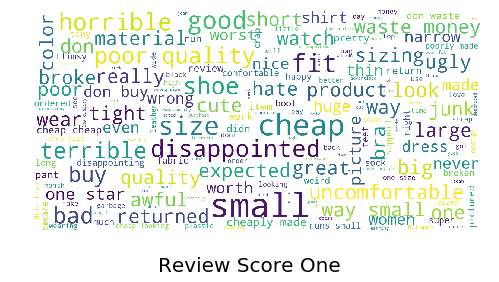

In [90]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

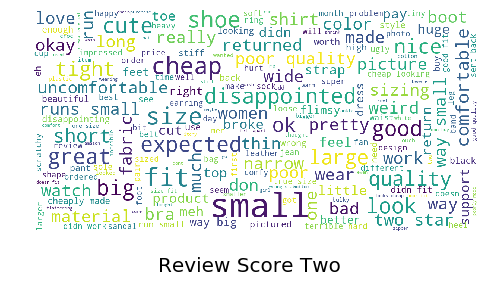

In [91]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

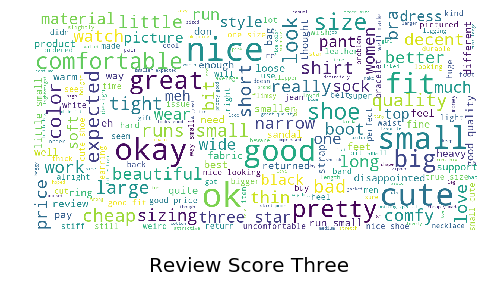

In [92]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

In [ ]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

In [ ]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")